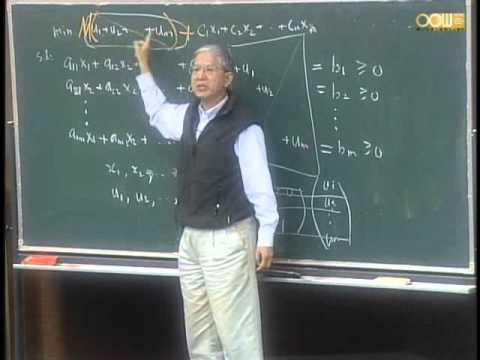

In [1]:
from __future__ import print_function
import numpy as np
from IPython.display import YouTubeVideo, display

display(YouTubeVideo("d5bCzrFTKLA", 600, 450))

## Simplex Method

**Solving**

$$
\min c^Tx \\
Ax = b \\
x \geq 0
$$

1. Let $A = [B | N]$ 
2. Find fundamental matrix $M$

In [2]:
def rearange(arr, basic_indices):
    arr_aranged = np.zeros_like(arr.T)
    non_basic_indices = [i for i in range(arr_aranged.shape[0]) if not i in basic_indices]
    indices = basic_indices + non_basic_indices
    arr_aranged[:] = arr.T[indices]
    return arr_aranged.T

In [3]:
def arange_back(arr_aranged, basic_indices):
    arr = np.zeros_like(arr_aranged.T)
    non_basic_indices = [i for i in range(arr.shape[0]) if not i in basic_indices]
    indices = basic_indices + non_basic_indices
    pairs = [p for p in enumerate(indices)]
    pairs.sort(key=lambda p: p[1])
    reordered_indices = [p[0] for p in pairs]
    arr[:] = arr_aranged.T[reordered_indices]
    return arr.T

In [11]:
def non_basic_indices(n, basic_indices):
    non_basic = [i for i in range(n) if not i in basic_indices]
    return non_basic

In [22]:
def index_map(n, basic_indices):
    """
    Given the number of columns, n, return a list of tuples
    
    for each tuple t, t[0] is the new column index
    t[1] is the original column index
    """
    non_basic = non_basic_indices(n, basic_indices)
    all_indices = basic_indices + non_basic
    index_map = dict([p for p in enumerate(all_indices)])
    
    return index_map

In [5]:
def get_fundamental_matrix(A, b_indices):
    m, n = A.shape
    A_new = rearange(A, b_indices)
    B = A_new[:,:m]
    N = A_new[:,m:]
    M = np.eye(n)
    M[:m,:B.shape[1]] = B
    M[:m,B.shape[1]:] = N
    return M

In [6]:
def compute_cost(A, c, b_indices):
    m, n = A.shape
    M = get_fundamental_matrix(A, b_indices)
    c_new = rearange(c, b_indices)
    M_inv = np.linalg.inv(M)
    costs = c_new.dot(M_inv)
    
    return costs

In [28]:
def solve_x(A, b, b_indices):
    x = np.zeros(A.shape[1])
    B = A[:,b_indices]
    x_b = np.linalg.inv(B).dot(b)
    x[:len(b_indices)] = x_b
    return x

In [54]:
def is_optimal(A, c, b_indices):
    m, n = A.shape
    cost = compute_cost(A, c, b_indices)
    if np.min(cost[m:]) >= 0:
        return True
    return False

In [38]:
def pick_one_direction(A, c, b_indices):
    """
    Pick one edge direction for M
    """
    if is_optimal(A, c, b_indices):
        return None
    cost = compute_cost(A, c, b_indices)
    for i, c in enumerate(cost[len(b_indices):], 1):
        if c < 0:
            return len(b_indices)+i

In [75]:
def solver_simplex(A, c, b, b_indices_init):
    """
    Solve:
        min c^T x
        Ax = b
        x >= 0
    params
    ======
    - c: 1D array of length n
    - A: m by n matrix (m < n)
    - b: 1D array of length m
    
    return
    ======
    - x: 1D array of length n
    """
    m, n = A.shape
    x = solve_x(A, b, b_indices_init)
    
    # check optimality
    if is_optimal(A, c, b_indices_init):
        return arange_back(x, b_indices_init)
    
    b_indices = b_indices_init
    print("original ", b_indices)
    while True:
        col_index_map = index_map(n, b_indices)
        cost = compute_cost(A, c, b_indices)
        
        # check boundness
        M = get_fundamental_matrix(A, b_indices)
        if np.all(M > 0):
            print("Unbounded LP, abort")
            return None
        q_index = pick_one_direction(A, c, b_indices)
        dq = M[:, q_index]
        q_index = col_index_map[q_index]
        alpha = np.inf
        candidate_index = 0
        for i, dqi in enumerate(dq[:m]):
            if dqi >= 0:
                continue
            temp_alpha = -x[i]/dqi
            if temp_alpha < alpha:
                candidate_index = i
        candidate_index = col_index_map[candidate_index]
        b_indices = list(filter(lambda x: not x == candidate_index, b_indices)) + [q_index]
        print(b_indices)
        if is_optimal(A, c, b_indices):
            print("Meet optimality")
            x = solve_x(A, b, b_indices)
            break
    return arange_back(x, b_indices)

In [76]:
A = np.array([[1, 1, 1, 0],
              [2, 1, 0, 1]])
b = np.array([40, 60])
c = np.array([-1.5, -1, 0, 0])

x = solver_simplex(A, c, b, [2,3])

original  [2, 3]
[3, 1]
[1, 2]
Meet optimality


In [68]:
x

array([  0.,  60., -20.,   0.])

------

In [79]:
A = np.array([[1, 0, 1, 0],
              [0, 1, 0, 1]])
b = np.array([1, 1])
c = np.array([-1, -1, 0, 0])

In [80]:
x = solver_simplex(A, c, b, [0, 1])

In [81]:
x

array([ 1.,  1.,  0.,  0.])